In [2]:
import numpy as np
import random
import sys, os
import torch as t

def set_all_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    t.manual_seed(seed)
    t.cuda.manual_seed(seed)
    t.backends.cudnn.deterministic = True
    t.backends.cudnn.benchmark = True
    
set_all_seeds(0)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/users/sv226/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/users/sv226/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
import feature_corrs
import pandas as pd

Could not load bitsandbytes native library: /home/users/sv226/.local/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: cannot open shared object file: No such file or directory
Traceback (most recent call last):
  File "/home/users/sv226/.local/lib/python3.10/site-packages/bitsandbytes/cextension.py", line 85, in <module>
    lib = get_native_library()
  File "/home/users/sv226/.local/lib/python3.10/site-packages/bitsandbytes/cextension.py", line 72, in get_native_library
    dll = ct.cdll.LoadLibrary(str(binary_path))
  File "/usr/lib/python3.10/ctypes/__init__.py", line 452, in LoadLibrary
    return self._dlltype(name)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /home/users/sv226/.local/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: cannot open shared object file: No such file or directory


In [5]:
from datasets import load_dataset, Dataset

In [6]:
from sae_lens import (
    SAE,
    ActivationsStore,
    HookedSAETransformer,
    LanguageModelSAERunnerConfig,
    SAEConfig,
    SAETrainingRunner,
    upload_saes_to_huggingface,
)

In [7]:
import pandas as pd

## display configuration

In [12]:
from IPython.display import HTML, IFrame, clear_output, display
from sae_lens.toolkit.pretrained_saes_directory import get_pretrained_saes_directory

In [13]:
def display_dashboard(
    sae_release="gpt2-small-res-jb",
    layer=7,
    latent_idx=0,
    width=800,
    height=600,
):
    sae_id = f"blocks.{layer}.hook_resid_pre"
    release = get_pretrained_saes_directory()[sae_release]
    neuronpedia_id = release.neuronpedia_id[sae_id]

    url = f"https://neuronpedia.org/{neuronpedia_id}/{latent_idx}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"

    print(url)
    display(IFrame(url, width=width, height=height))


latent_idx = 228
#display_dashboard(layer=7, latent_idx=latent_idx)

## loading dataset

In [98]:
imdb_dataset = load_dataset("stanfordnlp/imdb", split="train")
subset_size = 50000
batch_size = 8
max_length = 20
imdb_subset = imdb_dataset.shuffle(seed=0).select(range(subset_size))

IndexError: Index 49999 out of range for dataset of size 25000.

In [1]:
imdb_dataset.shuffle()[0]

NameError: name 'imdb_dataset' is not defined

In [133]:
imdb_dataset.shuffle().select(range(subset_size)).select(range(subset_size))['text'][0]

"The first time I saw this film, I loved it. It was different.<br /><br />I am a Christian (Bible believing). I don't go along with the crowd of right wing believers. I dropped out of that atmosphere.<br /><br />To me in their attempts to take over our government they are doing what Judas tried to do. I call it the Judas Syndrome.<br /><br />Judas didn't get it, even though Jesus said his Kingdom was not of this world.<br /><br />This film certainly showed some of that.<br /><br />I also liked that Jesus enjoyed the simple pleasure of playing games and jokes with his disciples.<br /><br />Also he was a very gorgeous Jesus.<br /><br />It's a watch-over and over movie.<br /><br />Very satisfying."

In [127]:
imdb_subset['text'][12]

'Never cast models and Playboy bunnies in your films! Bob Fosse\'s "Star 80" about Dorothy Stratten, of whom Bogdanovich was obsessed enough to have married her SISTER after her murder at the hands of her low-life husband, is a zillion times more interesting than Dorothy herself on the silver screen. Patty Hansen is no actress either..I expected to see some sort of lost masterpiece a la Orson Welles but instead got Audrey Hepburn cavorting in jeans and a god-awful "poodlesque" hair-do....Very disappointing...."Paper Moon" and "The Last Picture Show" I could watch again and again. This clunker I could barely sit through once. This movie was reputedly not released because of the brouhaha surrounding Ms. Stratten\'s tawdry death; I think the real reason was because it was so bad!'

## importing and inspecting

In [36]:
diffs7 = np.load("diffs_blocks.7.hook_resid_pre.npy")

In [23]:
import matplotlib.pyplot as plt

/home/users/sv226/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


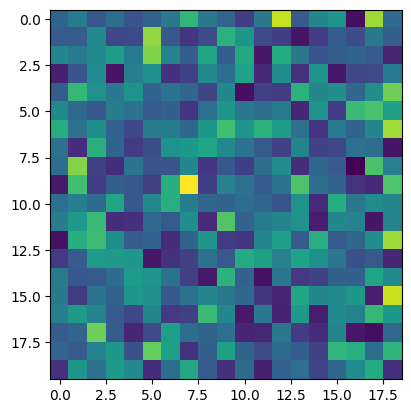

In [28]:
plt.imshow(diffs7[:20,1:])

In [34]:
diffs8 = np.load("diffs_blocks.8.hook_resid_pre.npy")

In [41]:
diffs7[2]

array([1108.5535  ,   34.405243,   20.875195,   56.34616 ,   44.779182,
         27.647322,   33.601475,   43.624973,   40.8872  ,   29.786343,
         39.27654 ,   49.949825,   32.98101 ,   27.915873,   45.136875,
         32.50765 ,   35.582756,   20.40806 ,   37.275017,   28.007952],
      dtype=float32)

In [42]:
diffs8[2]

array([1106.587   ,   39.16715 ,   36.737274,   39.831062,   44.305702,
         36.23438 ,   58.193222,   38.234432,   29.73148 ,   45.70475 ,
         30.433235,   47.00953 ,   17.410069,   47.778362,   35.58739 ,
         28.32014 ,   30.527891,   31.455044,   29.543417,   19.660187],
      dtype=float32)

In [163]:
codes7 = np.load("codes_blocks.7.hook_resid_pre.npy")

In [164]:
codes8 = np.load("codes_blocks.8.hook_resid_pre.npy")

In [186]:
for i in range(codes7.shape[-1]):
    for j in range(codes8.shape[-1]):
        x = codes7.mean(axis = 1)[:,i]
        y = codes8.mean(axis = 1)[:,j]
        corr = np.corrcoef([x,y])[0][1]  
        if corr > 0.1:
            print(f"7_{i}, 8_{j}: corr = {corr}")
               

/home/users/sv226/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/users/sv226/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


7_0, 8_24: corr = 0.12789896816880433
7_0, 8_47: corr = 0.10417915544280126
7_0, 8_220: corr = 0.14956274884328344
7_0, 8_281: corr = 0.12318560141063493
7_0, 8_364: corr = 0.13307153676447606
7_0, 8_367: corr = 0.10449197460037613
7_1, 8_45: corr = 0.10812350987273861
7_1, 8_90: corr = 0.4045587210236126
7_1, 8_194: corr = 0.7211257380715499
7_1, 8_331: corr = 0.35801686482632183
7_1, 8_395: corr = 0.3454310000134285
7_1, 8_455: corr = 0.1051609485071253
7_2, 8_73: corr = 0.31750101020252436
7_2, 8_216: corr = 0.2703866798259696
7_3, 8_123: corr = 0.24519168964954743
7_3, 8_134: corr = 0.5143298136683208
7_3, 8_253: corr = 0.24176684448696825
7_3, 8_310: corr = 0.12790143339473378
7_4, 8_8: corr = 0.13057378929067257


KeyboardInterrupt: 

In [183]:
corr

-0.0012963767449832146

In [61]:
codes7[0,6].nonzero()

(array([228, 248]),)

In [175]:
layer = 7
batch_idx = 4
codes = [codes7,codes8][layer-7]

arr = codes[batch_idx].nonzero()[1]
unique_elements, counts = np.unique(arr, return_counts=True)
sorted_indices = np.argsort(-counts)
sorted_unique_elements = unique_elements[sorted_indices]
print("Sorted latents:", [a for a in zip(sorted_unique_elements,counts[sorted_indices])])
print(imdb_subset[batch_idx]['text'])

Sorted latents: [(231, 6), (128, 2), (228, 2), (237, 2), (254, 2), (285, 2), (497, 2), (170, 1), (167, 1), (158, 1), (308, 1), (303, 1), (310, 1), (439, 1), (483, 1)]
I liked how this started out, featuring some decent special-effects especially for a film 50 years old. There was some pretty impressive scenery. However, the film bogs down fairly early on with some very dumb dialog as the males all try to flirt with Anne Francis "Altaira Morbius.")<br /><br />Viewing this in the '90s after a long absence, it was fun to see Francis again, an actress who has done mostly television shows since this film was released....and is still acting. It also was interesting to see a young-looking Leslie Nielsen ("Dr. John J. Adams"), who I wouldn't have recognized had it not been for this voice <br /><br />I watched half of this movie before the boredom came almost overwhelming and I had a strong desire to go to sleep. I appreciated them re-doing this VHS tape in stereo. but it was a weak effort. Thi

In [217]:
display_dashboard(layer=7, latent_idx=91)

https://neuronpedia.org/gpt2-small/7-res-jb/91?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [218]:
display_dashboard(layer=8, latent_idx=355)

https://neuronpedia.org/gpt2-small/8-res-jb/355?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [194]:
def vectorized_sparse_corr(T1: t.Tensor, T2: t.Tensor, threshold: float):
    """
    Compute sparse correlation matrix between columns of T1 and T2
    using vectorized operations.

    Inputs:
        T1: (B, D1) torch tensor
        T2: (B, D2) torch tensor
        threshold: float, minimum correlation to keep

    Returns:
        List of (i, j, corr_ij) where corr_ij > threshold
    """

    if T1.ndim == 3:
        T1 = T1.mean(dim=1)
    if T2.ndim == 3:
        T2 = T2.mean(dim=1)

    B, D1 = T1.shape
    D2 = T2.shape[1]

    # Center the data (zero-mean across B)
    T1_centered = T1 - T1.mean(dim=0, keepdim=True)
    T2_centered = T2 - T2.mean(dim=0, keepdim=True)

    # Normalize each column to unit norm (L2)
    T1_norm = T1_centered.norm(dim=0, keepdim=True) + 1e-8  # (1, D1)
    T2_norm = T2_centered.norm(dim=0, keepdim=True) + 1e-8  # (1, D2)

    T1_normalized = T1_centered / T1_norm  # (B, D1)
    T2_normalized = T2_centered / T2_norm  # (B, D2)

    # Compute correlation matrix: (D1, D2)
    corr_matrix = T1_normalized.T @ T2_normalized  # (D1, D2)

    # Get indices where |corr| > threshold
    mask = (corr_matrix.abs() > threshold)
    coords = mask.nonzero(as_tuple=False)  # shape (N, 2)

    result = [
        (int(i), int(j), float(corr_matrix[i, j]))
        for i, j in coords
    ]

    return result  # List of (i, j, correlation_ij)


In [195]:
T1 = t.tensor(codes7.mean(axis = 1))
T2 = t.tensor(codes8.mean(axis = 1))

In [196]:
corr = vectorized_sparse_corr(T1, T2, threshold = 0.9)

In [197]:
corr

[(75, 45, 0.9848563075065613),
 (91, 355, 0.9979999661445618),
 (139, 114, 0.929619312286377),
 (433, 436, 0.9361518621444702)]

In [204]:
b75, s75 = codes7[:,:,75].nonzero()
b45, s45 = codes8[:,:,45].nonzero()

In [210]:
len(set(b75).intersection(set(b45))) / (b75.size + b45.size)

0.237012987012987

In [211]:
intersect = set(b75).intersection(set(b45))

In [216]:
for i in intersect:
    print(s75[b75 == i])
    print(s45[b45 == i])
    print("------")

[4 5 6]
[4 5 6]
------
[14 15 16]
[14 15 16]
------
[4 5]
[4 5]
------
[19]
[19]
------
[ 3 18]
[3]
------
[14]
[14]
------
[14]
[14]
------
[ 8  9 10]
[8 9]
------
[18]
[18]
------
[3 4]
[3 4]
------
[8]
[8]
------
[9]
[9]
------
[7 8 9]
[6 7 9]
------
[3 4 5]
[3 4]
------
[16 17 18 19]
[15 16 17]
------
[7 8]
[8]
------
[18 19]
[18]
------
[8]
[8]
------
[15]
[15 16]
------
[ 5 14 15]
[14 15]
------
[12 13]
[12 13]
------
[8 9]
[8 9]
------
[4]
[4]
------
[18]
[18]
------
[14 15]
[15]
------
[3 4 6]
[3 4 6]
------
[2]
[2]
------
[ 6  7  9 10 13]
[6 7 9]
------
[14 15]
[14]
------
[ 4 14 15]
[ 4 14 15]
------
[4 5]
[4 5]
------
[8 9]
[8 9]
------
[3 4]
[3 4]
------
[ 3  7  8  9 12 16 17]
[ 3  7  8  9 16]
------
[5 6]
[5]
------
[10]
[10]
------
[5]
[5]
------
[9]
[9]
------
[10 11 16]
[ 9 10 11]
------
[7]
[7 8]
------
[2]
[2]
------
[3 4]
[3 4]
------
[3 7]
[7]
------
[8]
[8]
------
[18]
[ 2 18]
------
[14]
[14]
------
[3]
[3]
------
[2 3 4 7 8]
[3 4 7 8]
------
[11]
[11]
------
[ 9 

In [219]:
corr_features = np.load('correlated_features_7_8_imdb_5000.npy')

In [223]:
corr_features[:,0] = corr_features[:,0].astype(int)

In [227]:
1.09270000e+04

10927.0

In [228]:
1e+0

1.0

In [250]:
display_dashboard(layer=7, latent_idx=1)

https://neuronpedia.org/gpt2-small/7-res-jb/1?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [249]:
display_dashboard(layer=8, latent_idx=21144)

https://neuronpedia.org/gpt2-small/8-res-jb/21144?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [240]:
imdb_dataset = load_dataset('wikitext', 'wikitext-103-raw-v1', split = 'train')

In [5]:
import pandas as pd
df = pd.read_pickle('correlated_features_7_8_imdb_5000.pkl')

In [8]:
import torch as t

In [10]:
t.randn((10,10))[:,[1,2,3,4]].shape

torch.Size([10, 4])

In [15]:
imdb_dataset = load_dataset('wikitext', 'wikitext-103-raw-v1', split = 'train')
subset_size = 5000
batch_size = 8
max_length = 20
imdb_subset = imdb_dataset.shuffle(seed=0).select(range(subset_size))


In [251]:
imdb_subset[3792]

{'text': ' She then began a statewide law practice where she gained 12 years experience focusing on election law and campaign finance from 1988 – 2000 . She briefly worked for the Franklin County Board of Elections . In 1988 , Brunner represented the Ohio Pesticide Applicators for Responsible Regulation , when the Ohio Environmental Protection Agency held hearings about testing Ohio water supplies for pesticides that were not against federal regulations . She agreed that testing standards should be higher , but felt that such standards should not be mandated . She expressed an interest in public service when a seat on the Columbus City Council became available following the April 29 , 1988 death of John R. Maloney . The list of candidates who applied included at least 20 applicants . \n'}

In [11]:
import feature_corrs
model, sae1, sae2 = feature_corrs.load_model_and_saes('cpu',"gpt2-small-res-jb", 7, 8)
df = pd.read_pickle('correlated_features_7_8_imdb_5000.pkl')

2025-06-17 14:47:23.813651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750186043.964501 1471770 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750186044.008896 1471770 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750186044.366233 1471770 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750186044.366276 1471770 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750186044.366280 1471770 computation_placer.cc:177] computation placer alr

Loaded pretrained model gpt2-small into HookedTransformer


/home/users/sv226/.local/lib/python3.10/site-packages/sae_lens/sae.py:151: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


In [17]:
sae1.W_enc.unsqueeze(axis = 0).shape

torch.Size([1, 768, 24576])

In [28]:
df = pd.read_pickle('diff_correlated_features_2_11_wikitext_5000_0.pkl')

In [29]:
df

,mean,std,count
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0
5,NaN,NaN,0
6,NaN,NaN,0
7,NaN,NaN,0
8,NaN,NaN,0
9,NaN,NaN,0


In [22]:
df#.sort_values(by = 'corr', ascending = False)

,i,j,corr,p_i_given_j,p_j_given_i,topk_i,topk_j
0,6,2862,0.987935,0.200000,0.027273,"(3922, 4755, 4087)","(3922, 4755, 4087)"
1,15,18028,0.983778,0.600000,0.600000,"(1223, 3263, 388)","(4994, 4600, 1777)"
2,27,6700,0.909051,0.250000,0.142857,"(2082, 4476, 4551)","(2082, 134, 4246)"
3,27,15648,0.987883,0.125000,0.142857,"(2082, 4476, 4551)","(2082, 4979, 830)"
4,29,20699,0.922429,0.194444,0.583333,"(3085, 569, 1605)","(3085, 569, 1605)"
...,...,...,...,...,...,...,...
8011,24540,3934,0.962952,0.019231,1.000000,"(3548, 1, 0)","(3548, 3995, 1848)"
8012,24559,5587,0.923870,0.210526,0.024540,"(2004, 2739, 4998)","(2004, 2739, 4998)"
8013,24574,6450,0.991444,0.222222,0.333333,"(3049, 4444, 233)","(3049, 432, 665)"
8014,24574,9883,0.967528,0.071429,0.166667,"(3049, 4444, 233)","(3049, 23, 2016)"


In [53]:
l = df[['i','j','topk_i','topk_j']].iloc[4].tolist()

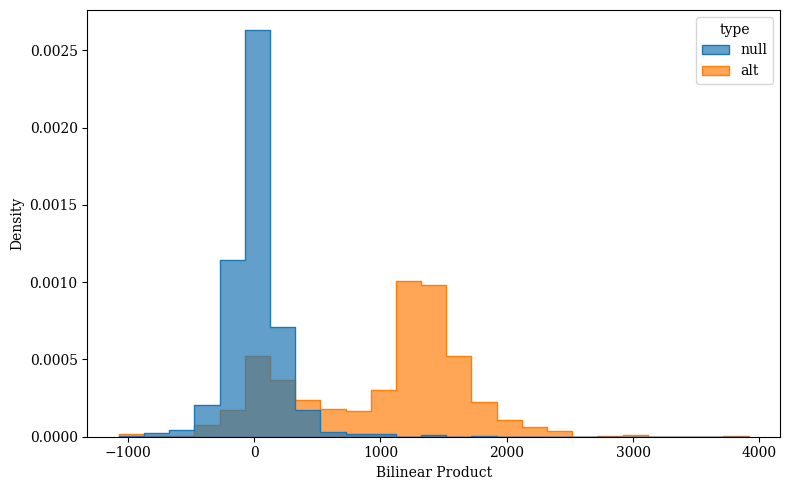

In [115]:


# Compute null distribution
ans = []
for i in range(1000):
        a = np.random.randint(sae1.W_dec.shape[0])
        b = np.random.randint(sae2.W_dec.shape[0])
        val = float(((sae1.W_dec[a, :] @ model.W_U) @ (sae2.W_dec[b, :] @ model.W_U)).detach().cpu().numpy())
        ans.append({'value': val, 'type': 'null'})

# Compute alt distribution
for i in range(1000):
    l = df[['i', 'j', 'topk_i', 'topk_j']].iloc[i].tolist()
    val = float(((sae1.W_dec[l[0], :] @ model.W_U) @ (sae2.W_dec[l[1], :] @ model.W_U)).detach().cpu().numpy())
    ans.append({'value': val, 'type': 'alt'})

# Convert to DataFrame
df_plot = pd.DataFrame(ans)

# Plot with seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=df_plot, x='value', hue='type', kde=False, stat='density', element='step', common_norm=False, alpha=0.7)
#plt.title("Distribution of Bilinear Products (Null vs Alt)")
plt.xlabel("Bilinear Product")
plt.ylabel("Density")
#plt.legend(title='Distribution')
plt.tight_layout()
plt.show()


In [ ]:
import heapq

heap = []  # this will be our max-heap
max_capacity = 100

for a in range(sae1.W_dec.shape[0]):
    for b in range(sae2.W_dec.shape[0]):
        val = float((sae1.W_dec[a, :] @ sae2.W_dec[b, :]).detach().cpu().numpy())
        # Push negative val to make it a max-heap
        
        item = (-val, (a, b))  # negate to simulate max-heap

        if len(heap) < max_capacity:
            heapq.heappush(heap, item)
        else:
            # Push new item and remove smallest (i.e., least negative = smallest dot)
            heapq.heappushpop(heap, item)


In [35]:
len(heap)

10000

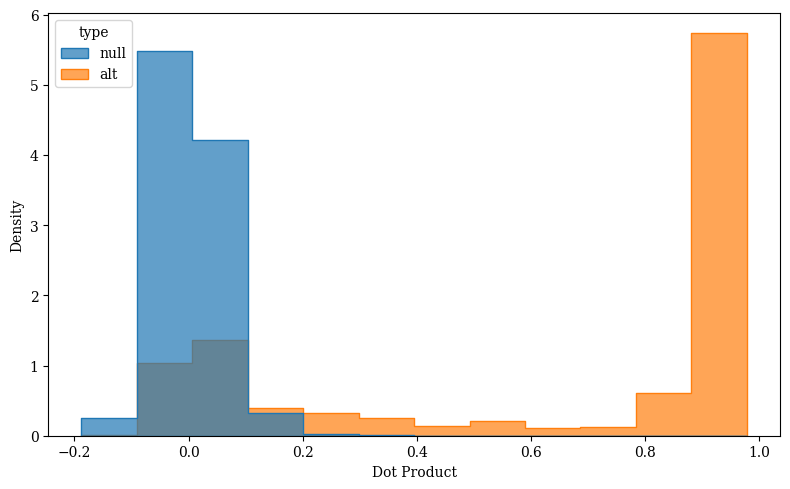

In [116]:
# Compute null distribution
ans = []
for i in range(1000):
    a = np.random.randint(sae1.W_dec.shape[0])
    b = np.random.randint(sae2.W_dec.shape[0])
    val = float(((sae1.W_dec[a, :] @ sae2.W_dec[b, :]).detach().cpu().numpy()))
    ans.append({'value': val, 'type': 'null'})

# Compute alt distribution
for i in range(1000):
    l = df[['i', 'j', 'topk_i', 'topk_j']].iloc[i].tolist()
    val = float(((sae1.W_dec[l[0], :] @ sae2.W_dec[l[1], :]).detach().cpu().numpy()))
    ans.append({'value': val, 'type': 'alt'})

# Convert to DataFrame
df_plot = pd.DataFrame(ans)

# Plot with seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=df_plot, x='value', hue='type', kde=False, stat='density', element='step', common_norm=False, alpha=0.7)
#plt.title("Distribution of Dot Products (Null vs Alt)")
plt.xlabel("Dot Product")
plt.ylabel("Density")
#plt.legend()#title='Distribution')
plt.tight_layout()
plt.show()


In [30]:
sae1

NameError: name 'sae1' is not defined

In [94]:
float(val)

1224.277587890625

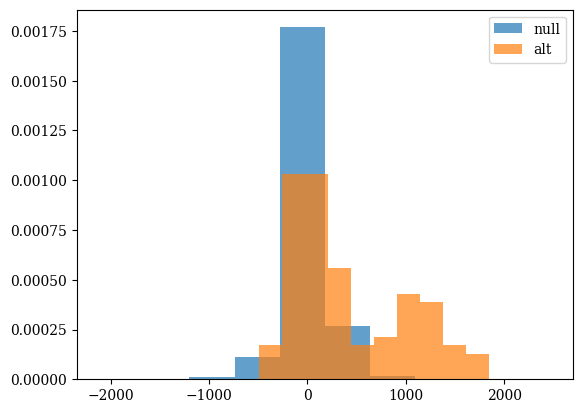

In [314]:
subset[4994]

{'text': ' Ultimate Elixir mixes notes of vanilla orchid and osmanthus top notes with cedarwood and amber middle notes , then adds in vanilla and tonka bean base notes . Kelly Bryant of StyleList wrote that the base notes of Heat Ultimate Elixir " drive the point home that this is a bouquet meant for one sexy siren " . Selling the scent \'s elixir , Macy \'s described the fragrance as an " opulent and intoxicating twist on the original scent . " Keeping with the scent \'s " sexy theme " , the new scarlet jus is contained in the original bottle , updated with a black atomizer , which has been described as " boudoir @-@ ready " by Katherine Kluznik Rentmeester of People magazine . \n'}

In [311]:
display_dashboard(layer=2, latent_idx=l[0])

https://neuronpedia.org/gpt2-small/2-res-jb/527?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [312]:
display_dashboard(layer=11, latent_idx=l[1])

https://neuronpedia.org/gpt2-small/11-res-jb/8045?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [273]:
[k for k in get_pretrained_saes_directory().keys() if 'gpt2-small-res' in k]

['gpt2-small-res-jb',
 'gpt2-small-res-jb-feature-splitting',
 'gpt2-small-res_sce-ajt',
 'gpt2-small-res_scefr-ajt',
 'gpt2-small-res_scl-ajt',
 'gpt2-small-res_sle-ajt',
 'gpt2-small-res_slefr-ajt',
 'gpt2-small-res_sll-ajt',
 'gpt2-small-resid-mid-v5-128k',
 'gpt2-small-resid-mid-v5-32k',
 'gpt2-small-resid-post-v5-128k',
 'gpt2-small-resid-post-v5-32k']

## Ablation experiments

In [123]:
from functools import partial

In [199]:
def ablate_sae_latent(
    sae_acts,
    hook,
    latent_idx
):
    """
    Ablate a particular latent at a particular sequence position. If either argument is None, we ablate at all latents
    / sequence positions.
    """
    sae_acts[:,:, latent_idx] = 0
    
def multiply_sae_latent(
    sae_acts,
    hook,
    latent_idx,
    factor = 2
):
    """
    Ablate a particular latent at a particular sequence position. If either argument is None, we ablate at all latents
    / sequence positions.
    """
    sae_acts[:,:, latent_idx] *= factor
    
def run(prompt, model, sae1, sae2, latent1, latent2, precompute = False):
    model.reset_hooks()
    model.reset_saes()
    if precompute:
        _, cache = model.run_with_cache(prompt, names_filter = [sae2.cfg.hook_name],
                                               stop_at_layer = sae2.cfg.hook_layer + 1,start_at_layer = sae1.cfg.hook_layer,
                                               prepend_bos = False)
    else:
        _, cache = model.run_with_cache(prompt, names_filter = [sae2.cfg.hook_name],
                                               stop_at_layer = sae2.cfg.hook_layer + 1,
                                               prepend_bos = False)
    return sae2.encode(cache[sae2.cfg.hook_name])[:,:,latent2].mean(axis = 1)
    
def run_with_reconstruction(prompt, model, sae1, sae2, latent1, latent2, precompute=False):
    model.reset_hooks()
    model.reset_saes()
    with model.saes(saes=[sae1]):
        if precompute:
            _, cache = model.run_with_cache(prompt,
                                            names_filter=[sae2.cfg.hook_name],
                                            stop_at_layer=sae2.cfg.hook_layer + 1,
                                            start_at_layer=sae1.cfg.hook_layer,
                                            prepend_bos=False)
        else:
            _, cache = model.run_with_cache(prompt,
                                            names_filter=[sae2.cfg.hook_name],
                                            stop_at_layer=sae2.cfg.hook_layer + 1,
                                            prepend_bos=False)
        return sae2.encode(cache[sae2.cfg.hook_name])[:, :, latent2].mean(axis=1)

def run_with_steering(prompt, model, sae1, sae2, latent1, latent2, factor = 2, precompute=False):
    model.reset_hooks()
    model.reset_saes()
    with model.saes(saes=[sae1]):
        with model.hooks(fwd_hooks=[(f'{sae1.cfg.hook_name}.hook_sae_acts_post', partial(multiply_sae_latent, latent_idx=latent1, factor = factor))]):
            if precompute:
                _, cache = model.run_with_cache(prompt,
                                                names_filter=[sae2.cfg.hook_name],
                                                stop_at_layer=sae2.cfg.hook_layer + 1,
                                                start_at_layer=sae1.cfg.hook_layer,
                                                prepend_bos=False)
            else:
                _, cache = model.run_with_cache(prompt,
                                                names_filter=[sae2.cfg.hook_name],
                                                stop_at_layer=sae2.cfg.hook_layer + 1,
                                                prepend_bos=False)
            return sae2.encode(cache[sae2.cfg.hook_name])[:, :, latent2].mean(axis=1)

    
def run_with_ablation(prompt, model, sae1, sae2, latent1, latent2, precompute = False):
    model.reset_hooks()
    model.reset_saes()
    with model.saes(saes = [sae1]):
        with model.hooks(fwd_hooks = [(f'{sae1.cfg.hook_name}.hook_sae_acts_post', partial(ablate_sae_latent, latent_idx = latent1))]):
            if precompute:
                _, cache = model.run_with_cache(prompt, names_filter = [sae2.cfg.hook_name],
                                                   stop_at_layer = sae2.cfg.hook_layer + 1,start_at_layer = sae1.cfg.hook_layer,
                                                   prepend_bos = False)
            else:
                _, cache = model.run_with_cache(prompt, names_filter = [sae2.cfg.hook_name],
                                                   stop_at_layer = sae2.cfg.hook_layer + 1,
                                                   prepend_bos = False)
            return sae2.encode(cache[sae2.cfg.hook_name])[:,:,latent2].mean(axis = 1)
                                           

In [203]:
run('how are you', model, sae1, sae2, l[0], l[1])

tensor([[0., 0., 0.]], grad_fn=<SelectBackward0>)

In [141]:
run_with_ablation("how are you", model, sae1, sae2, 0, 1).shape

AssertionError: 

In [161]:
[f'{sae1.cfg.hook_name}.hook_sae_acts_post', partial(ablate_sae_latent, latent_idx = l[0])]

['blocks.7.hook_resid_pre.hook_sae_acts_post',
 functools.partial(<function ablate_sae_latent at 0x7fe0314bea70>, latent_idx=1841)]

In [31]:
model, sae1, sae2 = feature_corrs.load_model_and_saes('cpu',"gpt2-small-res-jb", 2, 11)
df = pd.read_pickle('correlated_features_2_11_wikitext_5000_0.pkl')

2025-06-25 15:03:01.231278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750878181.253563 1575730 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750878181.260283 1575730 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750878181.286449 1575730 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750878181.286485 1575730 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750878181.286490 1575730 computation_placer.cc:177] computation placer alr

Loaded pretrained model gpt2-small into HookedTransformer


/home/users/sv226/.local/lib/python3.10/site-packages/sae_lens/sae.py:151: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


In [209]:
l = df.iloc[np.random.randint(df.shape[0])].tolist()

In [114]:
dataset = load_dataset('wikitext', 'wikitext-103-raw-v1', split = 'train')
subset_size = 50000
batch_size = 8
max_length = 20
subset = dataset.shuffle(seed=0).select(range(subset_size))


In [212]:
l

[12114,
 2912,
 0.9677756428718567,
 0.2142857164144516,
 0.4285714328289032,
 (4029, 1714, 3341),
 (4029, 1773, 1714)]

In [214]:
subset[l[-2][0]]['text']

' In 1964 , after having been introduced to cannabis by Bob Dylan in New York , Epstein was observed by McCartney standing in front of a mirror , pointing at himself and repeatedly saying " Jew ! " , while laughing loudly , which McCartney found hilarious and " very liberating " . Epstein later became heavily involved in the 1960s drug scene . During the four months when the Sgt. Pepper album was being recorded , Epstein spent his time on holiday , or at the Priory Clinic in Putney , where he tried unsuccessfully to curb his drug use . He left the Priory to attend the Sgt. Pepper launch party at his house on 24 Chapel Street , but returned to the Priory immediately after . \n'

In [263]:
sae1.cfg.hook_name

'blocks.2.hook_resid_pre'

In [281]:
ablation_diff = []
reconstruction_diff = []
multiply_diff = []
#ndf = df.sort_values(by = '
for i in range(0,500):
    l = df.iloc[i].tolist()
    _, cache = model.run_with_cache(subset[l[-1][0]]['text'], names_filter = [sae1.cfg.hook_name], stop_at_layer = sae1.cfg.hook_layer + 1, prepend_bos = True)
    first_hook = cache[sae1.cfg.hook_name]
    og = run(first_hook, model, sae1, sae2, l[0], l[1]).sum().detach()
    ablation = run_with_ablation(first_hook, model, sae1, sae2, l[0], l[1]).sum().detach()
    recon = run_with_reconstruction(first_hook, model, sae1, sae2, l[0], l[1]).sum().detach()
    multiply = run_with_steering(first_hook, model, sae1, sae2, l[0], l[1]).sum().detach()
    ablation_diff.append((ablation - og)/og)
    reconstruction_diff.append((recon - og)/og)
    multiply_diff.append((multiply - og)/og)

Text(0, 0.5, 'Ablation difference')

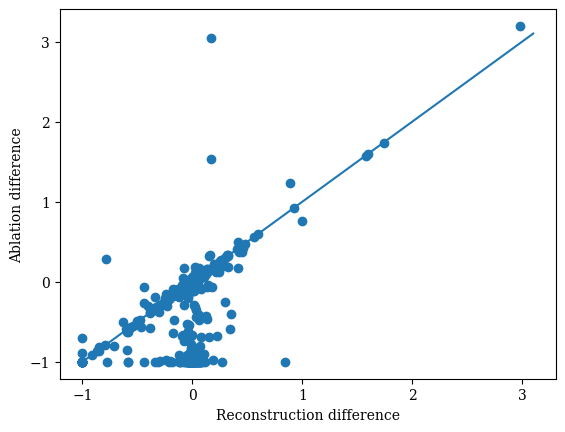

In [283]:
plt.scatter(reconstruction_diff, ablation_diff)
plt.plot([-1, 3.1], [-1, 3.1])
plt.xlabel("Reconstruction difference")
plt.ylabel("Ablation difference")

Text(0, 0.5, 'Ablation difference')

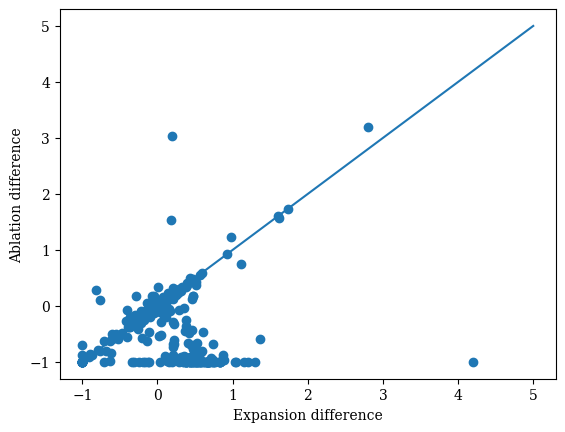

In [290]:
plt.scatter(multiply_diff, ablation_diff)
plt.plot([-1, 5], [-1,5 ])
plt.xlabel("Expansion difference")
plt.ylabel("Ablation difference")

In [294]:
np.argsort(ablation_diff)

array([203, 409, 185,  86, 464, 408, 465,  80, 192, 406,  75,  74, 404,
       399, 180,  69,  68, 211, 394,  63,  62,  61, 393, 391, 221, 226,
       385, 442, 450, 120, 116, 446, 114, 128, 131, 133, 108, 107, 134,
       138, 443, 472, 153, 155, 157,  99, 428, 417, 169, 456, 413, 411,
       461, 174, 331,  32, 282, 229, 284, 350, 288, 289, 349, 342, 333,
       498, 283, 329, 327,  12, 315, 321,   8,   7, 317,   0,   1, 476,
        44, 264, 265,  46, 484, 368,  41, 257, 266, 366, 485, 235, 231,
       230,  36, 324, 279, 320, 486, 132, 191, 269, 496, 109, 303, 296,
       488, 179, 396, 407,   4,  79, 121,  40, 206, 205, 352,   6, 495,
       367, 195, 160,  97, 452, 130, 362,   9, 326, 176, 388, 102, 387,
       127, 255, 351, 111,  10, 126,  35,  78,  11,  96,  84, 143, 204,
       308, 101,  82, 122, 458, 129, 306, 175,  83, 445, 103,  34, 148,
        38,  93, 188,   5, 105, 187, 468, 233, 487,  66, 414, 280, 271,
       395, 142, 455,  39, 489,  21,  72, 295, 216, 141, 166, 36

In [306]:
np.where(np.array(ablation_diff) > 3)

(array([ 31, 163, 299, 382, 431, 483]),)

In [308]:
ablation_diff[163]

tensor(3.1953)

In [309]:
l = df.iloc[163].tolist()

In [310]:
l

[527,
 8045,
 0.9616023302078247,
 1.0,
 0.0833333358168602,
 (4994, 3603, 3591),
 (4994, 1, 0)]

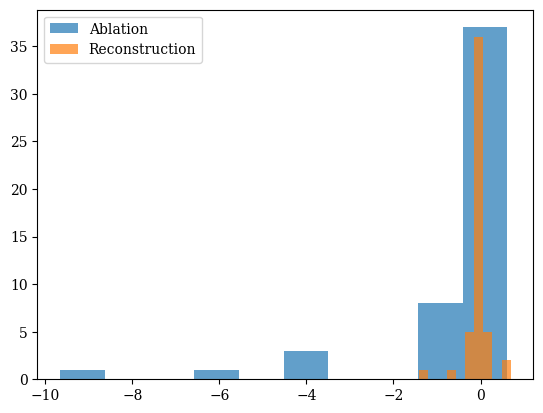

In [269]:
plt.hist(ablation_diff, alpha = 0.7, label = 'Ablation')
plt.hist(reconstruction_diff, alpha = 0.7, label = 'Reconstruction')
plt.legend()

## plot relative feature activations

In [200]:
import feature_corrs

In [201]:
dataloader = feature_corrs.process_dataset(dataset_name="wikitext",
        dataset_config="wikitext-103-raw-v1",subset_size = 20)

In [203]:
feature_corrs.plot_latent_activations(model, sae1, sae2, l[0], l[1])

AttributeError: module 'feature_corrs' has no attribute 'plot_latent_activations'

## sequence position analysis

In [10]:
model, sae1, sae2 = feature_corrs.load_model_and_saes('cpu',"gpt2-small-res-jb", 2, 11)
df = pd.read_pickle('correlated_features_2_11_wikitext_5000_0.pkl')

2025-06-17 13:25:00.466491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750181100.591493 1471540 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750181100.628016 1471540 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750181100.938249 1471540 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750181100.938286 1471540 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750181100.938290 1471540 computation_placer.cc:177] computation placer alr

Loaded pretrained model gpt2-small into HookedTransformer


/home/users/sv226/.local/lib/python3.10/site-packages/sae_lens/sae.py:151: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


In [11]:
dataset = load_dataset('wikitext', 'wikitext-103-raw-v1', split = 'train')
subset_size = 5000
batch_size = 8
max_length = 20
subset = dataset.shuffle(seed=0).select(range(subset_size))


In [34]:
def get_all_caches(prompt, model, sae1, sae2):
    return model.run_with_cache(
                    prompt,
                    names_filter=[sae1.cfg.hook_name, sae2.cfg.hook_name],
                    stop_at_layer=max(sae1.cfg.hook_layer, sae2.cfg.hook_layer) + 1,
                    prepend_bos=False,
                )[1]

def get_activations_diff(cache, model, sae1, sae2, latent_idx1, latent_idx2):
                
    # Get activations for both latents
    act1 = single_latent_encode(layerwise_activations_cache[sae1.cfg.hook_name], latent_idx1, sae1)
    act2 = single_latent_encode(layerwise_activations_cache[sae2.cfg.hook_name], latent_idx2, sae2)
    
    print(act1.shape)
    print(act2.shape)
    
    act1_max_seq = t.argmax(act1, axis = 1)
    act2_max_seq = t.argmax(act2, axis = 1)
    mask = (t.sum(act1, axis = 1) > 0) & (t.sum(act2, axis= 1) > 0)
    max_diff = (act2_max_seq - act1_max_seq)[mask]
    return t.where(mask, act2_max_seq - act1_max_seq, 0.1) # 0.1 indicates that one or the other feature did not appear

In [33]:
def single_latent_encode(vec, i, sae1):
    return t.relu((vec - sae1.b_dec[i]) @ sae1.W_enc[:,i] + sae1.b_enc[i])

In [ ]:
caches = get_all_caches(subset[i:i+100]['text'], model, sae1, sae2)

In [29]:
i = 5
print(subset[i]['text'])
diff = get_activations_diff(subset[i:i+10]['text'], model, sae1, sae2, 0, 0)

 On 26 June 1950 , a Douglas DC @-@ 4 Skymaster aircraft departed from Perth , Western Australia for an eight @-@ hour flight to Adelaide , South Australia . It crashed 18 minutes after take @-@ off , 32 nautical miles ( 59 km ) from Perth Airport . All but one of the 29 occupants were killed in the accident and the sole survivor died six days later . It was the worst civil aviation accident in Australia . 

torch.Size([10, 247])
torch.Size([10, 247])


In [30]:
diff

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])

In [92]:
mask = (diff != 0.1)
avg_diff = (diff * mask).sum(dim=0) / (mask.sum(dim=0).float() + 0.01)

(array([ 24.,  37.,  43.,  62., 139., 273., 225., 117.,  37.,  41.]),
 array([-242.57426453, -193.77818298, -144.98210144,  -96.18602753,
         -47.3899498 ,    1.40612793,   50.20220566,   98.99828339,
         147.7943573 ,  196.59043884,  245.38652039]),
 <BarContainer object of 10 artists>)

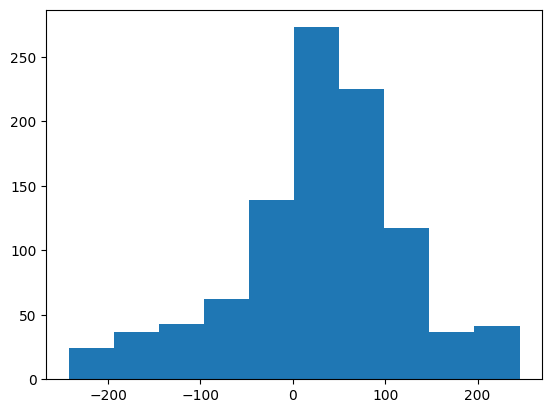

In [102]:
plt.hist(avg_diff[mask.sum(axis = 0) != 0])

In [ ]:
t.nonzero((diff * mask).sum(dim=0))

## new correlations

In [16]:
df = pd.read_pickle("correlated_features_2_11_wikitext_50000_0.pkl")

In [17]:
df_high_corr = df[(df['corr'] > 0)]

In [27]:
df_high_corr[(df_high_corr['corr'] < 0.99)].sort_values(by = 'corr')

,i,j,corr,p_i_given_j,p_j_given_i,topk_i,topk_j
242,3449,12687,0.900040,0.383721,2.606061,"(44951, 43350, 14407)","(14186, 5993, 31364)"
884,12484,18885,0.900180,0.326733,3.060606,"(45946, 2367, 14761)","(2367, 36883, 45946)"
91,1791,5532,0.900326,26.237288,0.038114,"(15732, 12736, 13398)","(12433, 12736, 47566)"
1615,22271,5421,0.900361,3.400000,0.294118,"(49074, 39931, 19077)","(49074, 19077, 5778)"
1095,15029,7773,0.900426,0.244726,4.086207,"(48406, 47939, 3405)","(48406, 5577, 3405)"
...,...,...,...,...,...,...,...
1038,14995,12338,0.988613,0.200000,5.000000,"(33136, 1498, 26428)","(33136, 14679, 11605)"
371,5962,16774,0.988714,1.084337,0.922222,"(28951, 42325, 14947)","(14947, 38835, 19215)"
510,7655,18096,0.988953,0.390625,2.560000,"(34909, 13273, 42029)","(23675, 13273, 34909)"
1413,19890,17603,0.988979,0.166667,6.000000,"(22445, 22446, 22444)","(22445, 15659, 14533)"


In [167]:
model, sae1, sae2 = feature_corrs.load_model_and_saes('cpu',"gpt2-small-res-jb", 2, 11)

Loaded pretrained model gpt2-small into HookedTransformer


/home/users/sv226/.local/lib/python3.10/site-packages/sae_lens/sae.py:151: UserWarning: 
This SAE has non-empty model_from_pretrained_kwargs. 
For optimal performance, load the model like so:
model = HookedSAETransformer.from_pretrained_no_processing(..., **cfg.model_from_pretrained_kwargs)
  warnings.warn(


In [172]:
subset[3001]['text']

' An update to Android 4 @.@ 4 @.@ 2 " KitKat " was released in South Korea in November 2013 , and for international models in March 2014 . LG touted a " noticeable speed boost " over Jelly Bean , along with battery life improvements , user interface tweaks , and other improvements brought by KitKat . A further update added a new security feature known as " Knock Code " ( as introduced by the LG G Pro 2 ) , which allows users to unlock their device by tapping quadrants of the screen in a sequence . \n'

In [137]:
c = 1778
i = df.iloc[c]['i']
j = df.iloc[c]['j']
top = subset[set(df.iloc[c]['topk_i']).intersection(set(df.iloc[c]['topk_j'])).pop()]['text']

In [169]:
for c in df.sort_values(by = 'corr', ascending = False).iloc[20:30].index:
    i = df.iloc[c]['i']
    j = df.iloc[c]['j']
    set_int = set(df.iloc[c]['topk_i']).intersection(set(df.iloc[c]['topk_j']))
    if len(set_int) == 0:
        continue
    top = subset[set_int]['text']
    #print(top)
    reg = run(top, model, sae1, sae2, i, j)
    print(f"{i}, {j}")
    print(f"Ablation: {((run_with_ablation(top, model, sae1, sae2, i, j, precompute = False) - reg)/reg).detach().numpy()}")
    print(f"Steering: {((run_with_steering(top, model, sae1, sae2, i, j, precompute = False) - reg)/reg).detach().numpy()}")
    print("-----")

24332, 18013
Ablation: [-0.7657963 -1.       ]
Steering: [ 0.10560826 -0.30281886]
-----
2103, 7145
Ablation: [-0.5886012 -0.5282514 -0.5686277]
Steering: [0.2767895  0.49146944 0.30850828]
-----
23522, 7145
Ablation: [-0.5471645  -0.39700022 -0.5737705 ]
Steering: [0.11575661 0.3322925  0.15558903]
-----
13673, 11487
Ablation: [-0.99421954 -1.         -1.        ]
Steering: [0.41155386 0.1287909  0.27189085]
-----
21243, 20215
Ablation: [-0.98818886]
Steering: [-0.84351695]
-----
14468, 8100
Ablation: [nan nan]
Steering: [nan nan]
-----
4941, 5692
Ablation: [-1.]
Steering: [0.7917872]
-----
23648, 18468
Ablation: [-1.]
Steering: [-0.01907953]
-----


In [198]:
run("Android is Google's Operating System", model, sae1, sae2, 13673, 11487, precompute = False)

tensor([10.8882], grad_fn=<MeanBackward1>)

In [209]:
run_with_steering("NBC Universal", model, sae1, sae2, 4941, 5692)

tensor([0.], grad_fn=<MeanBackward1>)

In [28]:
display_dashboard(layer = 2, latent_idx = 10606)

https://neuronpedia.org/gpt2-small/2-res-jb/10606?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [29]:
display_dashboard(layer = 11, latent_idx = 21276)

https://neuronpedia.org/gpt2-small/11-res-jb/21276?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300


In [51]:
sae1.W_dec[411] @ sae2.W_dec[2300]

tensor(0.6864, grad_fn=<DotBackward0>)

## diff analysis

In [85]:
corr = pd.read_pickle("correlated_features_2_11_wikitext_50000_0.pkl")

In [89]:
merge

,i,j,corr,p_i_given_j,p_j_given_i,topk_i,topk_j
0,222,503,0.945623,3.321678,0.301053,"(18164, 7360, 13077)","(18164, 8453, 27821)"
1,816,607,0.902800,4.333333,0.230769,"(36003, 2222, 26593)","(28537, 33835, 12642)"
2,238,1309,0.917048,0.360000,2.777778,"(23952, 4527, 32670)","(4527, 23952, 49175)"
3,404,1504,0.987931,0.331034,3.020833,"(40950, 16711, 32454)","(49347, 16711, 40932)"
4,489,1598,0.934711,8.906250,0.112281,"(46521, 25113, 9003)","(46521, 25113, 30277)"
...,...,...,...,...,...,...,...
1795,24200,23376,0.951075,0.705263,1.417910,"(17266, 2043, 33440)","(2043, 21036, 41470)"
1796,24204,23406,0.982301,1.455696,0.686957,"(7575, 22046, 28540)","(29926, 17955, 28273)"
1797,24271,23840,0.900851,0.500000,2.000000,"(17144, 44241, 23406)","(17144, 44241, 23406)"
1798,24279,23543,-0.949063,1.727234,0.578960,"(7690, 1476, 35683)","(1, 6, 7)"


In [86]:
diff = pd.read_pickle("diff_correlated_features_2_11_wikitext_50000_0.pkl")

In [87]:
diff.sort_values(by = 'mean', ascending = False).head(20)

,mean,std,count,i,j
98,64.577904,20.773323,16508,1004,7963
84,18.803213,30.182280,249,1599,2527
73,16.653334,26.501062,75,602,22135
60,8.096591,21.870924,176,397,19965
92,7.470900,24.381979,189,1844,5519
90,7.255556,25.946777,90,1009,5099
39,6.153846,21.244352,52,842,13683
91,4.016807,19.879864,119,1791,5532
14,3.288066,16.630816,32253,737,7748
4,2.731707,14.159418,41,489,1598


In [90]:
merge = diff.merge(corr, on = ['i','j'])

In [92]:
merge.sort_values(by = 'mean', ascending = False)

,mean,std,count,i,j,corr,p_i_given_j,p_j_given_i,topk_i,topk_j
98,64.577904,20.773323,16508,1004,7963,-0.908605,1.834610,0.545075,"(12463, 4076, 21187)","(1, 6, 7)"
84,18.803213,30.182280,249,1599,2527,0.916674,49.571430,0.020173,"(48556, 13947, 487)","(1719, 37168, 48556)"
73,16.653334,26.501062,75,602,22135,0.932773,3.591837,0.278409,"(11917, 2423, 32304)","(2423, 32304, 11917)"
60,8.096591,21.870924,176,397,19965,0.928589,0.899628,1.111570,"(31961, 5705, 48796)","(31961, 44927, 5705)"
92,7.470900,24.381979,189,1844,5519,0.940174,3.193333,0.313152,"(14839, 48259, 4879)","(46038, 13311, 4559)"
...,...,...,...,...,...,...,...,...,...,...
55,-2.784615,15.704796,195,124,18966,0.923663,0.250000,4.000000,"(45751, 26942, 40484)","(39697, 20261, 45751)"
16,-2.819444,21.840538,72,432,8061,0.921694,0.483333,2.068965,"(48879, 38086, 30235)","(38086, 30235, 48879)"
66,-3.605430,20.223291,1105,377,20901,0.960688,0.426873,2.342618,"(29179, 31573, 16197)","(29179, 31573, 20499)"
62,-3.611369,7.124838,9922,878,19180,0.919704,1.151684,0.868294,"(25924, 5793, 91)","(37591, 28655, 28576)"


In [66]:
diff['mean'].mean()

4.120108

In [102]:
subset[48556]['text']


' The eyes of slow lorises are forward @-@ facing , which gives stereo vision . Their eyes are large and possess a reflective layer , called the tapetum lucidum , that improves low @-@ light vision . It is possible that this layer blurs the images they see , as the reflected light may interfere with the incoming light . Slow lorises have monochromatic vision , meaning they see in shades of only one color . They lack the opsin gene that would allow them to detect short wavelength light , which includes the colors blue and green . \n'

In [100]:
subset

Dataset({
    features: ['text'],
    num_rows: 5000
})